In [1]:
from __future__ import unicode_literals, print_function, division

# System imports
import os
import sys
import argparse

# Numerics
import numpy as np
from numpy import ma
from scipy.interpolate import InterpolatedUnivariateSpline
from math import floor

# Plotting
import matplotlib.pyplot as plt
from matplotlib import scale as mscale
from matplotlib.transforms import Transform
from matplotlib.ticker import FixedLocator

# CLASS

from classy import Class

In [2]:
# Creates an instance of CLASS
cosmo = Class()
CLASS_INPUT={}
raw_cl={}

In [6]:
data_sets=('default','extra_cdm','dsg_cdm')
data_sets_non_def=('extra_cdm','dsg_cdm')

cosmo.struct_cleanup()
cosmo.set_default()
cosmo.compute()
raw_cl['default']=cosmo.raw_cl()
Omega0_cdm_def=cosmo.Omega0_cdm()
cosmo.struct_cleanup()

CLASS_INPUT['extra_cdm']={"Omega_cdm":Omega0_cdm_def*1.1,'output':'tCl'};
cosmo.set(CLASS_INPUT['extra_cdm']);
cosmo.compute()
raw_cl['extra_cdm']=cosmo.raw_cl()
cosmo.struct_cleanup()

CLASS_INPUT['dsg_cdm']={'output':'tCl',
                        'dsg_c_vis2':0,
                        'nap' : 'y',
                        'dsg_c_eff2':0,
                        'dsg_alpha':0.09230474156259431,
                        "dsg_log10a_vals":(','.join([str(num) for num in np.linspace(-15,1,100)])),
                        'dsg_w_vals':(','.join([str(0) for num in range(100)]))
                       }
                                      
cosmo.set(CLASS_INPUT['dsg_cdm'])
cosmo._fillparfile()
cosmo.compute()
raw_cl['dsg_cdm']=cosmo.raw_cl()
cosmo.struct_cleanup()

In [7]:
k_vals=raw_cl['default']['ell'][2:]
cl={}
for name in data_sets:
    cl[name]=raw_cl[name]['tt'][2:]

cl_ratio={}
for name in data_sets_non_def:
    cl_ratio[name]=cl[name]/cl['default']-1

Text(0.5,1,u'Relative change of $C_\\ell$ With Extra CDM')

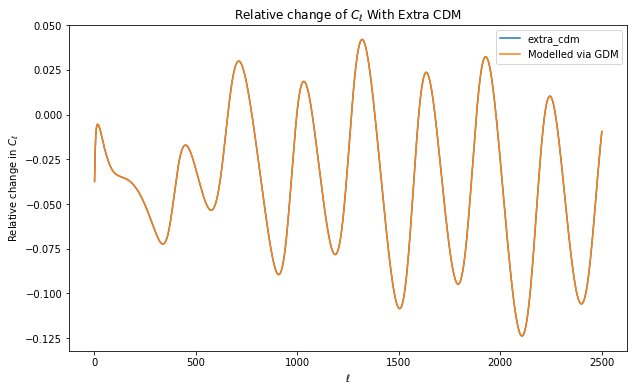

In [9]:
plt.figure(1,figsize=(10,6))
for name in data_sets_non_def:
    plt.plot(k_vals,cl_ratio[name])

plt.legend(('extra_cdm','Modelled via GDM'))
plt.xlabel('$\ell$')
plt.ylabel('Relative change in $C_\ell$')
plt.title('Relative change of $C_\ell$ With Extra CDM')

Text(0,0.5,u'Difference in Relative change in $C_\\ell$')

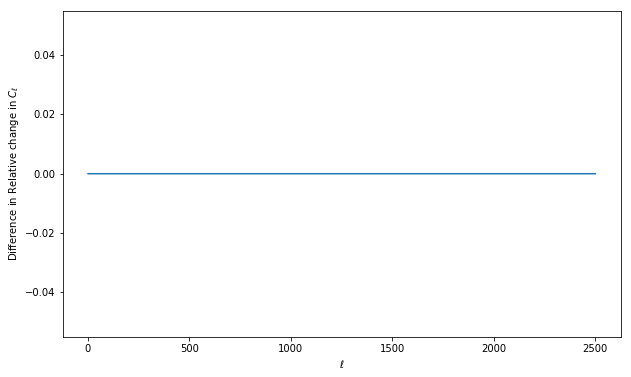

In [10]:
plt.figure(2,figsize=(10,6))
plt.plot(k_vals,cl_ratio['extra_cdm']-cl_ratio['dsg_cdm'])

plt.xlabel('$\ell$')
plt.ylabel('Difference in Relative change in $C_\ell$')

In [7]:
cl_ratio['extra_cdm']-cl_ratio['dsg_cdm']

array([0.04301999, 0.0348313 , 0.02839121, ..., 0.05826358, 0.05682573,
       0.05536883])

In [8]:
cl_ratio['dsg_cdm']

array([-0.08371998, -0.06749514, -0.05490108, ..., -0.15433259,
       -0.15195704, -0.14952933])

In [9]:
raw_cl['dsg_cdm']

{'ell': array([   0,    1,    2, ..., 2498, 2499, 2500]),
 'tt': array([0.00000000e+00, 0.00000000e+00, 1.43491203e-10, ...,
        8.00178868e-18, 7.98547460e-18, 7.96966054e-18])}

In [10]:
raw_cl['extra_cdm']

{'ell': array([   0,    1,    2, ..., 2498, 2499, 2500]),
 'tt': array([0.00000000e+00, 0.00000000e+00, 1.50228215e-10, ...,
        8.55308442e-18, 8.52056589e-18, 8.48851537e-18])}